In [2]:
from uproot_io import Events, View
#from event_plot import *
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
#import settings
#settings.init()

In [3]:
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
particle_id_dict = {-2212:"ANTIPROTON", -321:"KAON -", -211:"PION -", -13:"MUON -", -11:"ELECTRON", 0:"NO BEST MATCH", 11:"POSTIRON", 13:"MUON +", 22:"GAMMA", 211:"PION +", 321:"KAON +", 2212:"PROTON", 3112:"SIGMA -", 3222:"SIGMA +"}
filename = "projects\CheatedRecoFile_1.root"
events = Events(filename)

In [4]:
def pdg_idx(pdg_code,min_hits):
    temp = np.where(events.mc_pdg == pdg_code)[0]
    idx = [i for i in temp if events.reco_num_hits_w[i] > min_hits]
    return idx

In [5]:
def particle_rms_w(num_particle):
    hits_x_w=np.array([])
    hits_x=np.array([])
    for i in range(events.reco_num_hits_w[num_particle]):
        hits_x = np.append(hits_x, events.reco_hits_w[num_particle][i])
        hits_x_w = np.append(hits_x_w, events.reco_hits_x_w[num_particle][i])
    hits_bf = np.polyfit(hits_x,hits_x_w,1)
    hits_x_w_fit= [i * hits_bf[0] + hits_bf[1] for i in hits_x]
    residuals = np.subtract(hits_x_w,hits_x_w_fit)
    rms = np.std(residuals)
    return rms


def particle_disp_w(num_particle):
    length = ((events.reco_hits_w[num_particle][0]-events.reco_hits_w[num_particle][-1])**2 + (events.reco_hits_x_w[num_particle][0]-events.reco_hits_x_w[num_particle][-1])**2)**0.5
    return length

def particle_path_length_w(num_particle):
    path_length = 0
    for i in range(1,events.reco_num_hits_w[num_particle]):
        dx = events.reco_hits_w[num_particle][i] - events.reco_hits_w[num_particle][i-1]
        dy = events.reco_hits_x_w[num_particle][i] - events.reco_hits_x_w[num_particle][i-1]
        path_length += (dx**2+dy**2)**0.5
    return path_length

def sinousity_w(num_particle):
    return particle_path_length_w(num_particle)/particle_disp_w(num_particle)
    

In [30]:
proton = pdg_idx(2212,10)
pion_plus = pdg_idx(211,10)
pion_minus = pdg_idx(-211,10)
muon_plus = pdg_idx(13,10)
muon_minus = pdg_idx(-13,10) 
electron = pdg_idx(-11,10)
positron = pdg_idx(11,10)
gamma = pdg_idx(22,10)

proton_rms = [particle_rms_w(i) for i in proton]
proton_sinousity = [sinousity_w(i) for i in proton]

pion_plus_rms = [particle_rms_w(i) for i in pion_plus]
pion_plus_sinousity = [sinousity_w(i) for i in pion_plus]

pion_minus_rms = [particle_rms_w(i) for i in pion_minus]
pion_minus_sinousity = [sinousity_w(i) for i in pion_minus]

electron_rms =  [particle_rms_w(i) for i in electron]
electron_sinousity =  [sinousity_w(i) for i in electron]

positron_rms =  [particle_rms_w(i) for i in positron]
positron_sinousity =  [sinousity_w(i) for i in positron]

gamma_rms =  [particle_rms_w(i) for i in gamma]
gamma_sinousity = [sinousity_w(i) for i in gamma]

(array([0.00102648, 0.00133443, 0.00153972, 0.0029768 , 0.00513242,
        0.00626155, 0.00451653, 0.00564566, 0.00492712, 0.0059536 ,
        0.00513242, 0.0063642 , 0.00667214, 0.00564566, 0.00523506,
        0.00585095, 0.0059536 , 0.00646684, 0.00626155, 0.00656949,
        0.0089304 , 0.00718538, 0.00954629, 0.00821187, 0.00759598,
        0.00574831, 0.00851981, 0.00821187, 0.00544036, 0.00728803,
        0.00851981, 0.00728803, 0.00656949, 0.0089304 , 0.00831451,
        0.00769862, 0.00903305, 0.00882776, 0.01016218, 0.009341  ,
        0.00810922, 0.00810922, 0.00954629, 0.00769862, 0.00954629,
        0.01005954, 0.00862246, 0.01026483, 0.00882776, 0.0089304 ,
        0.00964894, 0.00882776, 0.01026483, 0.00749333, 0.00975159,
        0.01026483, 0.00872511, 0.00944365, 0.00841716, 0.01005954,
        0.01118867, 0.01190721, 0.01026483, 0.00841716, 0.01036748,
        0.00964894, 0.01159926, 0.00841716, 0.00739068, 0.00903305,
        0.00790392, 0.00821187, 0.00903305, 0.00

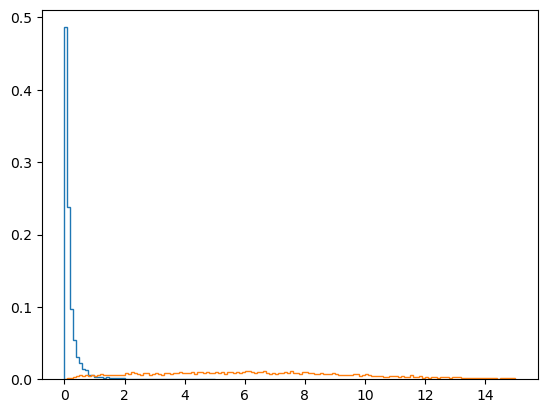

In [25]:

#plt.hist([a_rms,b_rms],range=(0,5),bins = 50,histtype = 'step',weights = [(np.ones_like(a_rms)/np.size(a_rms)),(np.ones_like(b_rms)/np.size(b_rms))])

A = proton_rms
B = gamma_rms

plt.hist(A,range=(0,5),histtype='step',bins=50,weights=(np.ones_like(A)/np.size(A)))
plt.hist(B,range=(0,15),histtype='step',bins=150,weights=(np.ones_like(B)/np.size(B)))


(array([0.00800657, 0.00882776, 0.00975159, 0.00944365, 0.01108602,
        0.01047013, 0.01036748, 0.00800657, 0.00985424, 0.01077807,
        0.01088072, 0.00872511, 0.01098337, 0.00985424, 0.01057278,
        0.00985424, 0.00954629, 0.009341  , 0.01026483, 0.00780127,
        0.00646684, 0.00800657, 0.00749333, 0.00964894, 0.00862246,
        0.00975159, 0.00698009, 0.00656949, 0.00821187, 0.0063642 ,
        0.00831451, 0.00790392, 0.00687744, 0.00656949, 0.00626155,
        0.00677479, 0.0063642 , 0.00667214, 0.0063642 , 0.00862246,
        0.00656949, 0.00656949, 0.00687744, 0.00544036, 0.00626155,
        0.00492712, 0.0059536 , 0.0061589 , 0.00523506, 0.00554301,
        0.00564566, 0.00441388, 0.00544036, 0.00574831, 0.00472182,
        0.00626155, 0.00544036, 0.00585095, 0.00605625, 0.00441388,
        0.00369534, 0.00451653, 0.00472182, 0.00451653, 0.00513242,
        0.00379799, 0.00492712, 0.00420858, 0.00502977, 0.00554301,
        0.00461917, 0.00400328, 0.00461917, 0.00

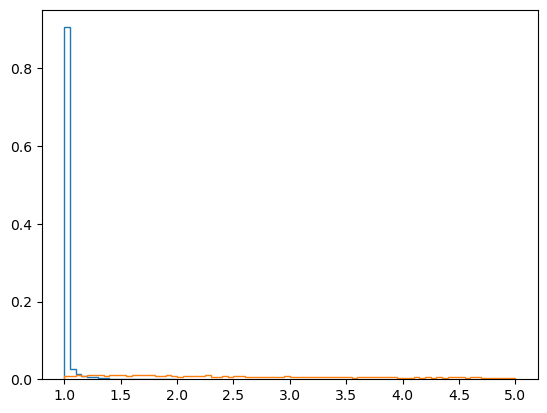

In [27]:
C = proton_sinousity
D = gamma_sinousity

plt.hist(C,range=(1,2),histtype='step',bins=20,weights=(np.ones_like(C)/np.size(C)))
plt.hist(D,range=(1,5),histtype='step',bins=80,weights=(np.ones_like(D)/np.size(D)))



In [32]:
showers = np.concatenate((gamma,electron,positron))
tracks = np.concatenate((proton,pion_plus,pion_minus,muon_plus,muon_minus))

showers_rms = [ particle_rms_w(i) for i in showers]
showers_sinousity = [sinousity_w(i) for i in showers]

tracks_rms = [ particle_rms_w(i) for i in tracks]
tracks_sinousity = [ sinousity_w(i) for i in tracks]


(array([0.00110647, 0.00258176, 0.00442587, 0.00540939, 0.00799115,
        0.0089132 , 0.0089132 , 0.00823703, 0.00805262, 0.00854438,
        0.00817556, 0.00866732, 0.00719203, 0.00713056, 0.00682321,
        0.0066388 , 0.00633145, 0.00688468, 0.00670027, 0.0066388 ,
        0.00866732, 0.00749939, 0.00879026, 0.00737644, 0.00756086,
        0.00614704, 0.00774527, 0.00780674, 0.00583969, 0.00676174,
        0.00743791, 0.00688468, 0.00633145, 0.00719203, 0.0076838 ,
        0.00719203, 0.00719203, 0.00762233, 0.00823703, 0.00811409,
        0.00706909, 0.00670027, 0.00774527, 0.00651586, 0.00860585,
        0.00823703, 0.00731497, 0.00799115, 0.0072535 , 0.00743791,
        0.00762233, 0.00731497, 0.00885173, 0.00620851, 0.00860585,
        0.00879026, 0.00731497, 0.00823703, 0.0082985 , 0.0082985 ,
        0.00965085, 0.00983526, 0.00842144, 0.00817556, 0.00915909,
        0.00854438, 0.01044996, 0.00774527, 0.00676174, 0.00842144,
        0.00860585, 0.00786821, 0.0089132 , 0.00

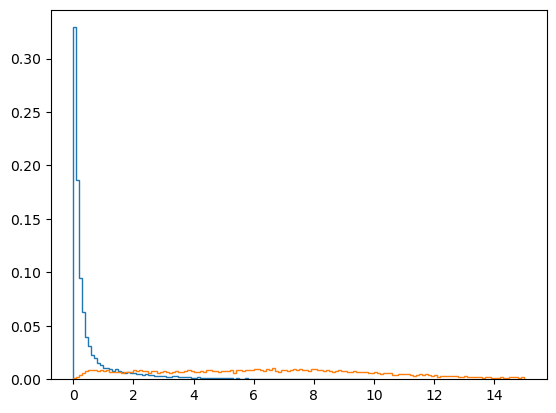

In [34]:
plt.hist(tracks_rms,range=(0,10),histtype='step',bins=100,weights=(np.ones_like(tracks_rms)/np.size(tracks_rms)))
plt.hist(showers_rms,range=(0,15),histtype='step',bins=150,weights=(np.ones_like(showers_rms)/np.size(showers_rms)))

(array([0.03891075, 0.03128842, 0.03079666, 0.02710843, 0.02249816,
        0.0205311 , 0.0193017 , 0.01850258, 0.01702729, 0.015552  ,
        0.01364642, 0.01481436, 0.01524465, 0.01131055, 0.01210966,
        0.01192525, 0.01020408, 0.01026555, 0.0105729 , 0.01063437,
        0.00983526, 0.00915909, 0.00823703, 0.00879026, 0.00756086,
        0.00799115, 0.00792968, 0.00872879, 0.00835997, 0.00756086,
        0.00596263, 0.00713056, 0.00626998, 0.00688468, 0.00762233,
        0.00676174, 0.00743791, 0.00565527, 0.00626998, 0.00491763,
        0.00510204, 0.00565527, 0.00516351, 0.00504057, 0.00510204,
        0.00485616, 0.0049791 , 0.00522498, 0.00510204, 0.0060241 ,
        0.00442587, 0.00510204, 0.00522498, 0.00387263, 0.00461028,
        0.00399557, 0.0049791 , 0.00448734, 0.0033194 , 0.00424146,
        0.00368822, 0.00381116, 0.00325793, 0.00356528, 0.00411851,
        0.00338087, 0.00295058, 0.00338087, 0.00258176, 0.00319646,
        0.0027047 , 0.0027047 , 0.00344234, 0.00

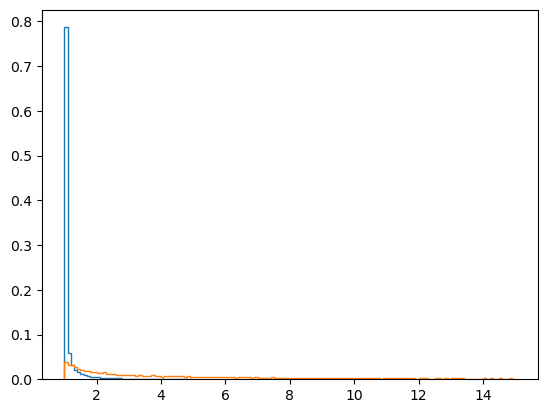

In [35]:
plt.hist(tracks_sinousity,range=(1,5),histtype='step',bins=40,weights=(np.ones_like(tracks_sinousity)/np.size(tracks_sinousity)))
plt.hist(showers_sinousity,range=(1,15),histtype='step',bins=140,weights=(np.ones_like(showers_sinousity)/np.size(showers_sinousity)))

In [38]:
tracks_length = [particle__w(i) for i in tracks]
showers_length = [particle_disp_w(i) for i in showers]

(array([1.98549299e-02, 3.22104746e-02, 2.77231374e-02, 3.08581264e-02,
        3.19645931e-02, 3.21490042e-02, 3.38087042e-02, 3.22719449e-02,
        3.09810671e-02, 2.91984264e-02, 2.73543152e-02, 2.77231374e-02,
        2.78460782e-02, 2.58790263e-02, 2.32358003e-02, 2.49569707e-02,
        2.36046226e-02, 2.21293337e-02, 2.12072781e-02, 2.02852225e-02,
        2.08384559e-02, 1.90558151e-02, 1.89943447e-02, 1.75805262e-02,
        1.79493484e-02, 1.64125891e-02, 1.74575854e-02, 1.60437669e-02,
        1.51831817e-02, 1.27858372e-02, 1.48143595e-02, 1.40767150e-02,
        1.36464224e-02, 1.33390706e-02, 1.16793705e-02, 1.37078928e-02,
        1.19867224e-02, 1.27243669e-02, 1.00811409e-02, 9.83525940e-03,
        9.40496681e-03, 1.07573150e-02, 8.97467421e-03, 8.85173346e-03,
        8.91320384e-03, 8.42144087e-03, 8.29850012e-03, 8.79026309e-03,
        5.71674453e-03, 5.90115564e-03, 7.00762233e-03, 5.96262601e-03,
        5.16351119e-03, 5.16351119e-03, 4.54880747e-03, 3.565281

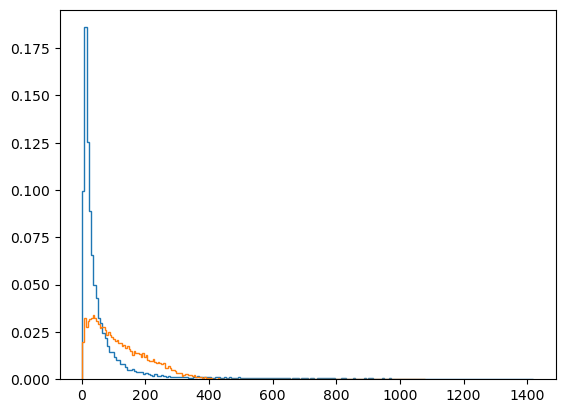

In [42]:
plt.hist(tracks_length,histtype='step',bins=200,weights=(np.ones_like(tracks_length)/np.size(tracks_length)))
plt.hist(showers_length,histtype='step',bins=200,weights=(np.ones_like(showers_length)/np.size(showers_length)))